In [1]:
# !pip install yahoo_finance_api2

In [2]:
import sys
from yahoo_finance_api2 import share
from yahoo_finance_api2.exceptions import YahooFinanceError

my_share = share.Share('MSFT')
symbol_data = None

try:
    symbol_data = my_share.get_historical(
        share.PERIOD_TYPE_DAY,        # 期間 日
        10,                           # 期間 10日
        share.FREQUENCY_TYPE_MINUTE,  # 頻度 分
        5,                            # 頻度 5分
    )
except YahooFinanceError as e:
    print(e.message)
    sys.exit(1)

print(symbol_data)

{'timestamp': [1652688000000, 1652688300000, 1652688600000, 1652688900000, 1652689200000, 1652689500000, 1652689800000, 1652690100000, 1652690400000, 1652690700000, 1652691000000, 1652691300000, 1652691600000, 1652691900000, 1652692200000, 1652692500000, 1652692800000, 1652693100000, 1652693400000, 1652693700000, 1652694000000, 1652694300000, 1652694600000, 1652694900000, 1652695200000, 1652695500000, 1652695800000, 1652696100000, 1652696400000, 1652696700000, 1652697000000, 1652697300000, 1652697600000, 1652697900000, 1652698200000, 1652698500000, 1652698800000, 1652699100000, 1652699400000, 1652699700000, 1652700000000, 1652700300000, 1652700600000, 1652700900000, 1652701200000, 1652701500000, 1652701800000, 1652702100000, 1652702400000, 1652702700000, 1652703000000, 1652703300000, 1652703600000, 1652703900000, 1652704200000, 1652704500000, 1652704800000, 1652705100000, 1652705400000, 1652705700000, 1652706000000, 1652706300000, 1652706600000, 1652706900000, 1652707200000, 1652707500

In [3]:
import pandas as pd

df = pd.DataFrame(symbol_data)
df.tail(10)

,timestamp,open,high,low,close,volume
1214,1653398400000,258.010000,258.412000,257.850000,258.280000,0.0
1215,1653398700000,257.970000,258.250000,257.610000,257.950000,0.0
1216,1653399000000,257.900909,259.523010,257.320007,258.625000,1471305.0
1217,1653399300000,259.109985,259.109985,257.630005,258.410004,743824.0
1218,1653399600000,258.500000,258.924988,258.160004,258.169891,385614.0
1219,1653399900000,258.109985,258.109985,257.945007,257.945007,416061.0
1220,1653400200000,257.809998,258.700012,257.660004,258.089996,251558.0
1221,1653400500000,258.079987,258.130005,256.319000,256.464996,406199.0
1222,1653400800000,NaN,NaN,NaN,NaN,NaN
1223,1653400832000,256.109985,256.109985,256.109985,256.109985,0.0


In [4]:
df['datetime'] = pd.to_datetime(df.timestamp, unit='ms')
df.tail(10)

,timestamp,open,high,low,close,volume,datetime
1214,1653398400000,258.010000,258.412000,257.850000,258.280000,0.0,2022-05-24 13:20:00
1215,1653398700000,257.970000,258.250000,257.610000,257.950000,0.0,2022-05-24 13:25:00
1216,1653399000000,257.900909,259.523010,257.320007,258.625000,1471305.0,2022-05-24 13:30:00
1217,1653399300000,259.109985,259.109985,257.630005,258.410004,743824.0,2022-05-24 13:35:00
1218,1653399600000,258.500000,258.924988,258.160004,258.169891,385614.0,2022-05-24 13:40:00
1219,1653399900000,258.109985,258.109985,257.945007,257.945007,416061.0,2022-05-24 13:45:00
1220,1653400200000,257.809998,258.700012,257.660004,258.089996,251558.0,2022-05-24 13:50:00
1221,1653400500000,258.079987,258.130005,256.319000,256.464996,406199.0,2022-05-24 13:55:00
1222,1653400800000,NaN,NaN,NaN,NaN,NaN,2022-05-24 14:00:00
1223,1653400832000,256.109985,256.109985,256.109985,256.109985,0.0,2022-05-24 14:00:32


In [5]:
my_share = share.Share('MSFT')
symbol_data = None

try:
    symbol_data = my_share.get_historical(
        share.PERIOD_TYPE_MONTH, 6,
        share.FREQUENCY_TYPE_DAY, 1,
    )
except YahooFinanceError as e:
    print(e.message)
    sys.exit(1)

df = pd.DataFrame(symbol_data)
df['datetime'] = pd.to_datetime(df.timestamp, unit='ms')
df

,timestamp,open,high,low,close,volume,datetime
0,1637937000000,334.350006,337.929993,328.119995,329.679993,24217200,2021-11-26 14:30:00
1,1638196200000,334.940002,339.029999,334.739990,336.630005,28563500,2021-11-29 14:30:00
2,1638282600000,335.320007,337.779999,328.989990,330.589996,42885600,2021-11-30 14:30:00
3,1638369000000,335.130005,339.279999,329.390015,330.079987,33337600,2021-12-01 14:30:00
4,1638455400000,330.299988,333.489990,327.799988,329.489990,30766000,2021-12-02 14:30:00
...,...,...,...,...,...,...,...
119,1652880600000,263.000000,263.600006,252.770004,254.080002,31356000,2022-05-18 13:30:00
120,1652967000000,253.899994,257.670013,251.880005,253.139999,32692300,2022-05-19 13:30:00
121,1653053400000,257.239990,258.540009,246.440002,252.559998,39169300,2022-05-20 13:30:00
122,1653312600000,255.490005,261.500000,253.429993,260.649994,33085200,2022-05-23 13:30:00


In [6]:
my_share = share.Share('6752.T')
symbol_data = None

try:
    symbol_data = my_share.get_historical(
        share.PERIOD_TYPE_MONTH, 6,
        share.FREQUENCY_TYPE_DAY, 1,
    )
except YahooFinanceError as e:
    print(e.message)
    sys.exit(1)

df = pd.DataFrame(symbol_data)
df['datetime'] = pd.to_datetime(df.timestamp, unit='ms')
df

,timestamp,open,high,low,close,volume,datetime
0,1637798400000,1366.5,1374.0,1353.5,1354.0,3630100,2021-11-25 00:00:00
1,1637884800000,1339.5,1342.0,1309.0,1316.0,6470700,2021-11-26 00:00:00
2,1638144000000,1278.0,1295.5,1268.0,1273.0,8041200,2021-11-29 00:00:00
3,1638230400000,1280.0,1285.5,1233.0,1242.5,15389900,2021-11-30 00:00:00
4,1638316800000,1236.0,1252.0,1233.0,1244.0,7528000,2021-12-01 00:00:00
...,...,...,...,...,...,...,...
114,1652832000000,1147.5,1156.5,1128.5,1142.0,5706000,2022-05-18 00:00:00
115,1652918400000,1105.0,1116.0,1103.0,1113.5,7204600,2022-05-19 00:00:00
116,1653004800000,1125.5,1146.0,1123.5,1142.0,7545300,2022-05-20 00:00:00
117,1653264000000,1159.0,1166.5,1149.0,1153.5,5157700,2022-05-23 00:00:00


In [7]:
import datetime

df['datetime_JST'] = df['datetime'] + datetime.timedelta(hours=9)
df

,timestamp,open,high,low,close,volume,datetime,datetime_JST
0,1637798400000,1366.5,1374.0,1353.5,1354.0,3630100,2021-11-25 00:00:00,2021-11-25 09:00:00
1,1637884800000,1339.5,1342.0,1309.0,1316.0,6470700,2021-11-26 00:00:00,2021-11-26 09:00:00
2,1638144000000,1278.0,1295.5,1268.0,1273.0,8041200,2021-11-29 00:00:00,2021-11-29 09:00:00
3,1638230400000,1280.0,1285.5,1233.0,1242.5,15389900,2021-11-30 00:00:00,2021-11-30 09:00:00
4,1638316800000,1236.0,1252.0,1233.0,1244.0,7528000,2021-12-01 00:00:00,2021-12-01 09:00:00
...,...,...,...,...,...,...,...,...
114,1652832000000,1147.5,1156.5,1128.5,1142.0,5706000,2022-05-18 00:00:00,2022-05-18 09:00:00
115,1652918400000,1105.0,1116.0,1103.0,1113.5,7204600,2022-05-19 00:00:00,2022-05-19 09:00:00
116,1653004800000,1125.5,1146.0,1123.5,1142.0,7545300,2022-05-20 00:00:00,2022-05-20 09:00:00
117,1653264000000,1159.0,1166.5,1149.0,1153.5,5157700,2022-05-23 00:00:00,2022-05-23 09:00:00


In [8]:
df.set_index(['datetime_JST'], inplace=True)
df

,timestamp,open,high,low,close,volume,datetime
datetime_JST,,,,,,,
2021-11-25 09:00:00,1637798400000,1366.5,1374.0,1353.5,1354.0,3630100,2021-11-25 00:00:00
2021-11-26 09:00:00,1637884800000,1339.5,1342.0,1309.0,1316.0,6470700,2021-11-26 00:00:00
2021-11-29 09:00:00,1638144000000,1278.0,1295.5,1268.0,1273.0,8041200,2021-11-29 00:00:00
2021-11-30 09:00:00,1638230400000,1280.0,1285.5,1233.0,1242.5,15389900,2021-11-30 00:00:00
2021-12-01 09:00:00,1638316800000,1236.0,1252.0,1233.0,1244.0,7528000,2021-12-01 00:00:00
...,...,...,...,...,...,...,...
2022-05-18 09:00:00,1652832000000,1147.5,1156.5,1128.5,1142.0,5706000,2022-05-18 00:00:00
2022-05-19 09:00:00,1652918400000,1105.0,1116.0,1103.0,1113.5,7204600,2022-05-19 00:00:00
2022-05-20 09:00:00,1653004800000,1125.5,1146.0,1123.5,1142.0,7545300,2022-05-20 00:00:00


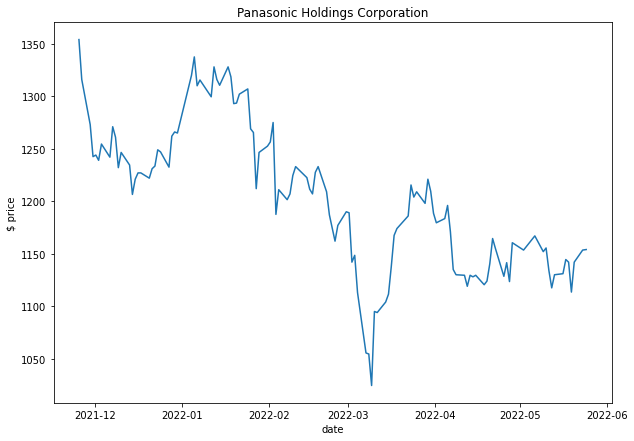

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.plot(df.index, df['close'])
plt.xlabel('date')
plt.ylabel('$ price')
plt.title('Panasonic Holdings Corporation')
plt.show()

In [10]:
import numpy as np

n = 5
sma = []

for i in range(len(df)):
    if i < n:
        sma.append(np.nan)
        continue
    v = sum(df['close'][i-n:i]) / n
    sma.append(v)

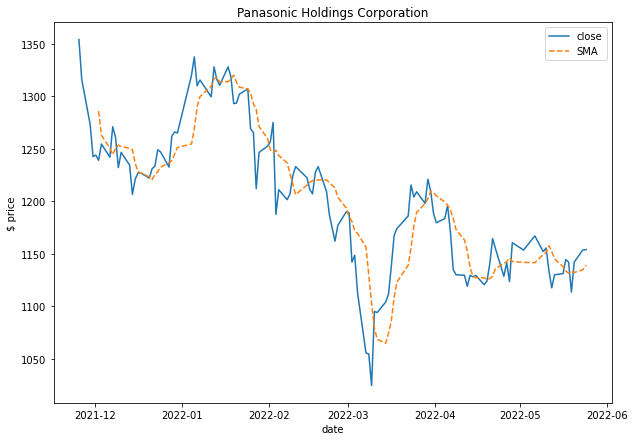

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))

plt.plot(df.index, df['close'], label='close')
plt.plot(df.index, sma, linestyle='--', label='SMA')

plt.xlabel('date')
plt.ylabel('$ price')
plt.title('Panasonic Holdings Corporation')
plt.legend(loc='upper right')
plt.show()